## 1. Exploratory Data Analysis

#### A360 MDK interface

In [1]:
a360ai

<A360 AI Interface for project: Customer Churn>

In [2]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'Customer Churn'

In [3]:
!pip install inflection

  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import inflection
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

### 1. Set Default Data Repo and load data

In [6]:
a360ai.set_default_datarepo(DATAREPO)

In [7]:
a360ai.list_datasets()

,base_name,extension,size
1,Reward-Customer-Churn.csv,csv,736215.0
2,X.parquet,parquet,174436.0
3,X_drift.parquet,parquet,25692.0
4,y.parquet,parquet,42876.0


In [8]:
df = a360ai.load_dataset("Reward-Customer-Churn.csv")

### 2. Data overview

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MobileOnRecord,AddressOnRecord,LinkedAccount,TwoFactorAuth,...,DeviceProtection,TechSupport,NewsletterSubscribe,PaperlessBilling,Contract,LastLogInOneMonth,Generation,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Target,No,...,No,No,No,No,Month-to-month,Yes,Gen Z,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Target,Yes,...,Yes,No,No,No,One year,No,Gen X,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Target,Yes,...,No,No,No,No,Month-to-month,Yes,Gen X,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Target,Yes,...,Yes,Yes,No,No,One year,No,Millennials,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Starbucks,No,...,No,No,No,No,Month-to-month,Yes,Gen Z,70.70,151.65,Yes


#### Check Null value

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   SeniorCitizen        7043 non-null   int64  
 3   Partner              7043 non-null   object 
 4   Dependents           7043 non-null   object 
 5   tenure               7043 non-null   int64  
 6   MobileOnRecord       7043 non-null   object 
 7   AddressOnRecord      7043 non-null   object 
 8   LinkedAccount        7043 non-null   object 
 9   TwoFactorAuth        7043 non-null   object 
 10  OnlineBackup         7043 non-null   object 
 11  DeviceProtection     7043 non-null   object 
 12  TechSupport          7043 non-null   object 
 13  NewsletterSubscribe  7043 non-null   object 
 14  PaperlessBilling     7043 non-null   object 
 15  Contract             7043 non-null   o

#### Check data shape

In [11]:
df.shape

(7043, 21)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Check duplicated values

In [13]:
df.duplicated().sum()

0

#### Check data type

In [14]:
# numerical
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(df.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')

data_type_general = dict()

for col in df.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MobileOnRecord,AddressOnRecord,LinkedAccount,TwoFactorAuth,...,DeviceProtection,TechSupport,NewsletterSubscribe,PaperlessBilling,Contract,LastLogInOneMonth,Generation,MonthlyCharges,TotalCharges,Churn
general data types,categorical,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


In [15]:
data_type = pd.DataFrame(df.dtypes).T.rename({0:'python data types'})
data_type

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,MobileOnRecord,AddressOnRecord,LinkedAccount,TwoFactorAuth,...,DeviceProtection,TechSupport,NewsletterSubscribe,PaperlessBilling,Contract,LastLogInOneMonth,Generation,MonthlyCharges,TotalCharges,Churn
python data types,object,object,int64,object,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object


#### Check numerical data

In [16]:
variation_numerical = dict()

for col in column_numerical:
  tmp = f'{df[col].min()} - {df[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,MonthlyCharges,TotalCharges
data variation,0 - 72,18.25 - 118.75,- 999.9


#### Check categorical data

In [17]:
variation_categorical = dict()

for col in column_categorical:
  tmp = df[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,customerID,gender,SeniorCitizen,Partner,Dependents,MobileOnRecord,AddressOnRecord,LinkedAccount,TwoFactorAuth,OnlineBackup,DeviceProtection,TechSupport,NewsletterSubscribe,PaperlessBilling,Contract,LastLogInOneMonth,Generation,Churn
data variation,"0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKFF...","Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, Yes","Amazon, Starbucks, Target","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Boomers, Gen X, Gen Z, Millennials","No, Yes"


### 3. Exploratory data analysis (EDA)

In [18]:
# numerical
column_numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

# categorical
column_categorical = list(df.columns)
column_categorical.remove('tenure')
column_categorical.remove('MonthlyCharges')
column_categorical.remove('TotalCharges')

# only contains input features
column_categorical.remove('Churn')

In [19]:
data_viz = df.copy()
data_viz.loc[:,'Churn'] = data_viz.loc[:, 'Churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')

#### Visualization function

In [20]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

#### Check target distribution (churn %)

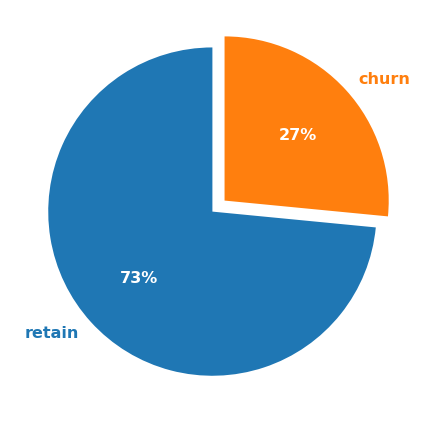

In [21]:
pie_data = data_viz['Churn'].value_counts(normalize=True).values * 100
pie_label = data_viz['Churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

#### Understand how churn might happen

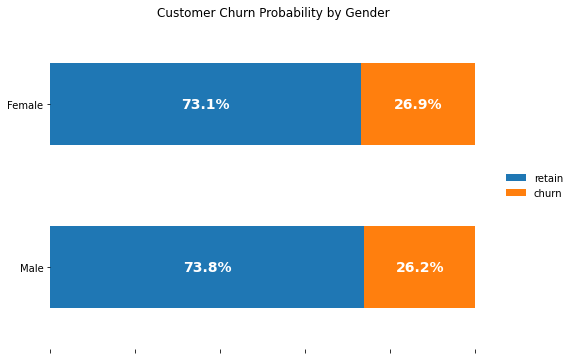

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
stacked_bar_plot(data=data_viz, x='gender', y='Churn', ax=ax)

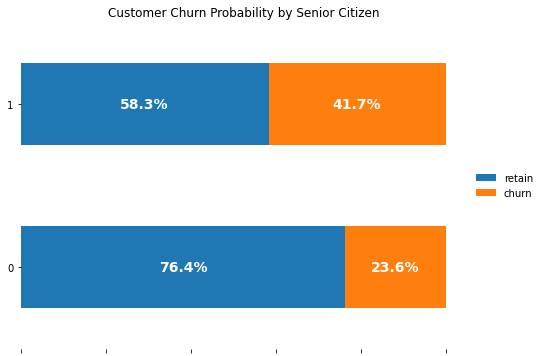

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
stacked_bar_plot(data=data_viz, x='SeniorCitizen', y='Churn', ax=ax)

#### Churn probability by tenure

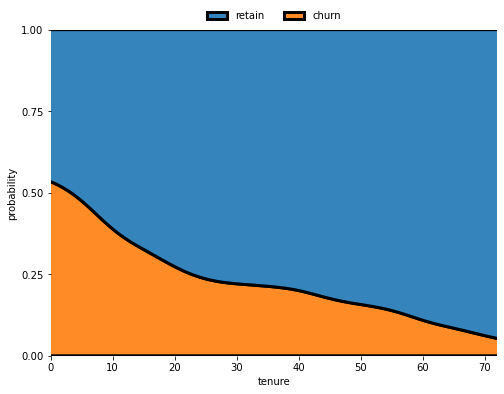

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='tenure', hue='Churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['tenure'].max(),10))
ax.set_xlim(data_viz['tenure'].min(),data_viz['tenure'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

#### Tenure by contract type

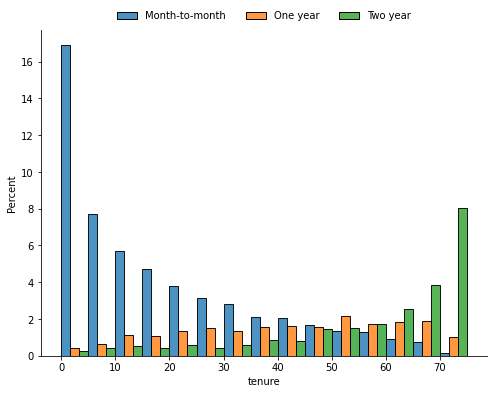

In [25]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=data_viz, x='tenure', hue='Contract', stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()  
plt.show()